### Задания на проект.
1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь 2017 года выяви когорту с самым высоким retention на 3й месяц. (15 баллов)

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. (23 балла)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# импортируем библиотеки

In [2]:
df_customers   = pd.read_csv('C:/jupyter/first_project/data/olist_customers_dataset.csv')
df_order_items = pd.read_csv('C:/jupyter/first_project/data/olist_order_items_dataset.csv',
                             parse_dates = ['shipping_limit_date'],\
                             dayfirst=False)
df_orders      = pd.read_csv('C:/jupyter/first_project/data/olist_orders_dataset.csv',\
                             parse_dates = ['order_purchase_timestamp',\
                                            'order_approved_at',\
                                            'order_delivered_carrier_date',\
                                            'order_delivered_customer_date',\
                                            'order_estimated_delivery_date'],\
                             dayfirst=False)
# считываем данные, все колонки с данными сразу парсим.

# не удалось сослаться на ссылки на датафреймы на яндекс диске, поэтому расположил датафреймы
# в своей папке на сервере
# если Вы будете выполнять код, то назначьте, пожалуйста, на переменные выше следующие датафремы
# df_customers <- olist_customers_dataset.csv
# df_order_items <- olist_order_items_dataset.csv
# df_orders <- olist_orders_dataset.csv

In [3]:
df_customers # таблица с уникальными идентификаторами пользователе

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

**Описание переменных таблицы df_customers:**  
*customer_id* — позаказный идентификатор пользователя  
*customer_unique_id* —  уникальный идентификатор пользователя  (аналог номера паспорта)  
*customer_zip_code_prefix* —  почтовый индекс пользователя  
*customer_city* —  город доставки пользователя  
*customer_state* —  штат доставки пользователя 

In [5]:
df_order_items # товарные позиции, входящие в заказы

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:
df_order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

**Описание переменных таблицы df_order_items:**  
*order_id* —  уникальный идентификатор заказа (номер чека)  
*order_item_id* —  идентификатор товара внутри одного заказа  
*product_id* —  ид товара (аналог штрихкода)  
*seller_id* — ид производителя товара  
*shipping_limit_date* —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике  
*price* —  цена за единицу товара  
*freight_value* —  вес товара

In [7]:
df_orders # таблица заказов

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [8]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

**Описание переменных таблицы df_orders:**  
*order_id* —  уникальный идентификатор заказа (номер чека)  
*customer_id* —  позаказный идентификатор пользователя  
*order_status* —  статус заказа  
*order_purchase_timestamp* —  время создания заказа  
*order_approved_at* —  время подтверждения оплаты заказа  
*order_delivered_carrier_date* —  время передачи заказа в логистическую службу  
*order_delivered_customer_date* —  время доставки заказа  
*order_estimated_delivery_date* —  обещанная дата доставки

# 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

### Ответим себе на вопрос: какие статусы в колонке order_status в таблице заказов (df_orders) соотвествуют факту совершения покупки? 

Возможные статусы в колонке order_status:  
delivered —  доставлен пользователю  
shipped —  отгружен со склада  
canceled —  отменён  
unavailable —  недоступен  
invoiced —  выставлен счёт  
processing —  в процессе сборки заказа  
created —  создан  
approved —  подтверждён

Посмотрим на структуру данных заказов с разными статусами в таблице заказов (df_orders):

In [9]:
df_orders.query('order_status == "delivered"').head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18


Статус: **delivered** (доставлен пользователю).  
Заказ оплачен и доставлен, считаем за покупку.

In [10]:
df_orders.query('order_status == "delivered"').order_approved_at.isna().sum()
# подстчитаем количество NaN'ов в колонке order_approved_at при статусе delivered

14

После проверки количества неоплаченных заказов, выяснилось что со статусом delivered есть 14 неоплаченных заказов, их за покупку считать не будем.  
Для этого при дальнейшей работе исключим из таблицы заказы со статусом delivered и без времени подтверждения оплаты в колонке order_approved_at. 

_______________________________________________________________________________________________________

In [11]:
df_orders.query('order_status == "shipped"').head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28


Статус: **shipped** (отгружен со склада).  
Заказ оплачен и отгружен со склада, считаем за покупку.

In [12]:
df_orders.query('order_status == "shipped"').order_approved_at.isna().sum()
# подстчитаем количество NaN'ов в колонке order_approved_at при статусе shipped

0

Отсутствуют неоплаченные заказы.

_______________________________________________________________________________________________________

In [13]:
df_orders.query('order_status == "canceled"').head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14


Статус: **canceled** (отменён).  
Заказ оплачен, но отменён. Соответсвенно, деньги необходимо будет вернуть, а товар останется в магазине.  
**Не** считаем за покупку.

_______________________________________________________________________________________________________

In [14]:
df_orders.query('order_status == "unavailable"').head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05


Статус: **unavailable** (недоступен).  
Не совсем понятно на основе данных в таблице df_orders что означает статус unavailable (недоступен), давайте попробуем соединить таблицы df_orders и df_order_items и поиcкать ответы в "большой" таблице.

In [15]:
df_orders.merge(df_order_items, on = 'order_id')\
         .query('order_status =="unavailable"')\
         .drop_duplicates('order_id')
# соединяем таблицы: df_orders -><- df_order_items (inner)
# отсортируем таблицу по условию статус = unavailable
# удалим дубликаты по столбцу order_id, это необходимо, потому что иначе,
# если в заказе больше одной позиции (order_item_id) их номера могут задваиваться,
# а нам нужно просто посмотреть структуру данных.

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
37563,dc18a044b56ed174037ca164cdf2e921,4a06381959b6670756de02e07b83815f,unavailable,2016-10-05 14:16:28,2016-10-06 15:56:49,NaT,NaT,2016-11-29,1,faa268ecc8a8434cb4ebee091b3222d6,f0563bacf40c311f1c4d3d6b67b8a7a7,2016-10-21 16:18:52,1199.0,28.78
57385,4dd47e84e6b8ff4a63d0b8425e6d788e,96bbcbc8372c86da857d842dfda6bd72,unavailable,2016-10-06 23:49:18,2016-10-07 01:09:08,NaT,NaT,2016-11-24,1,2aa489c905e1d41d8c716a6d6912d8c2,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 01:09:09,299.9,13.68
68759,3c3ca08854ca922fe8e9cedfd6841c8a,88c36fbd3df96094f90f0315e1d2dd90,unavailable,2016-10-08 12:13:38,2016-10-08 13:21:35,NaT,NaT,2016-11-30,1,ac6c24af9f913c9375a3ea77883bda6e,5206cc4bc2297c833e6061c49bf9c43f,2016-10-12 13:21:35,35.0,10.96
70666,54bb06e1ca86bd99ee2a8d6288bf4ede,98bfbf477ed9f40a0264f5e527a446be,unavailable,2016-10-06 13:38:39,2016-10-06 14:22:19,NaT,NaT,2016-12-12,1,bef13288a0f8b26d763411ced1dfa268,cf281cf8b7affbdfe751b29cc85580e1,2016-10-29 09:43:46,64.9,25.33
89694,1a47da1d66c70489c8e35fe2b5433ab7,3d8e326c3cef3a9bba7ca121baac5fc3,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaT,NaT,2016-12-07,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 18:53:48,249.9,20.85
94645,2fd1c83dd4714cf3cf796fffb6c8de62,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29,1,17c7ec33a1657924ad493e6978b4bf91,3d01d1c414c44b5943a09619ff3853cb,2016-10-10 15:55:42,99.0,9.12


При мёрже типом inner у нас сохранилось всего 6 заказов со статусом order_status, попробуем left.

In [16]:
aa = df_orders.merge(df_order_items, on = 'order_id', how = 'left')\
              .query('order_status =="unavailable"')\
              .drop_duplicates('order_id')\
              .sort_values('order_id')
# соединяем таблицы: df_orders <- df_order_items (в левую), это поможет нам сохранить все данные
# из таблицы df_orders
# отсортируем таблицу по условию статус = unavailable
# удалим дубликаты по столбцу order_id, это необходимо, потому что иначе,
# если в заказе больше одной позиции (order_item_id) их номера могут задваиваться,
# а нам нужно просто посмотреть структуру данных.
aa

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
40049,0010dedd556712d7bb69a19cb7bbd37a,3a92efdb6e6163dc1734d44f2f5f6d04,unavailable,2017-10-21 19:32:06,2017-10-24 03:25:32,NaT,NaT,2017-11-03,NaN,NaN,NaN,NaT,NaN,NaN
95467,00a500bc03bc4ec968e574c2553bed4b,3d2f26eab3f79dd1fe9977f615e70c2f,unavailable,2017-11-23 10:53:01,2017-11-25 10:54:38,NaT,NaT,2018-01-08,NaN,NaN,NaN,NaT,NaN,NaN
29685,00bca4adac549020c1273714d04d0208,1541ebabf956d17f3afe883790bd7dd3,unavailable,2017-02-14 14:49:29,2017-02-14 15:03:38,NaT,NaT,2017-03-13,NaN,NaN,NaN,NaT,NaN,NaN
90868,00daac8efd71674d62356c2a306d1e4c,2b99e152f2351410951c503a2f6a2d7e,unavailable,2017-11-21 19:20:25,2017-11-21 19:29:26,NaT,NaT,2017-12-12,NaN,NaN,NaN,NaT,NaN,NaN
3339,0130f0f71fb0e831d18e6a3b33a3a50c,e56f6dff7b8ac9813ddeb2312f0d834f,unavailable,2017-05-12 10:17:23,2017-05-13 03:10:13,NaT,NaT,2017-05-22,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100696,fdcca0e15a4d03e3fb89fb14664a3744,58ee086556a160d66dc3f6d43b4efcc3,unavailable,2017-09-11 20:02:08,2017-09-11 20:15:25,NaT,NaT,2017-10-02,NaN,NaN,NaN,NaT,NaN,NaN
70139,fddbd183387b5c9bcbafbd0fe965301f,bade46d49478a63c01dca6a9ae49dfa9,unavailable,2017-09-23 10:25:00,2017-09-26 03:24:31,NaT,NaT,2017-10-18,NaN,NaN,NaN,NaT,NaN,NaN
46547,fe87d4b944748f63ca5ed22cc55b6fb6,d992eb012e1599214218191d39c99693,unavailable,2017-12-05 09:20:36,2017-12-05 15:14:07,NaT,NaT,2017-12-21,NaN,NaN,NaN,NaT,NaN,NaN
11525,feae5ecdf2cc16c1007741be785fe3cd,ca05f8b53b1ad2a64bf34baa8aa7f4f6,unavailable,2017-11-11 16:41:06,2017-11-11 16:56:15,NaT,NaT,2017-11-27,NaN,NaN,NaN,NaT,NaN,NaN


При просмотре второй таблицы видим большое количество NaN'ов, что может говорить нам о том, что в таблице df_order_items может не быть некоторых order_id. 

In [17]:
df_order_items.query('order_id =="00bca4adac549020c1273714d04d0208"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


Можем предположить, что статус **unavailable** является неким маркером о том, что что-то пошло не так. Заказ потерялся, что-то сломалось в данных. Но у каждого заказа со статусом unavailable. Есть дата оплаты:

In [18]:
aa.query('order_status =="unavailable"').order_approved_at.isna().sum()
# подстчитаем количество NaN'ов в колонке order_approved_at

0

Что может означать, что что-то сломалось на нашей стороне, но заказ оплачен клиентом.  
Соотвественно, заказы со статусом **unavailable** считаем за покупку.

In [19]:
df_orders.query('order_status == "unavailable"').order_approved_at.isna().sum()
# подстчитаем количество NaN'ов в колонке order_approved_at при статусе unavailable

0

Отсутствуют неоплаченные заказы.

_______________________________________________________________________________________________________

In [20]:
df_orders.query('order_status == "invoiced"').head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09


Статус: **invoiced** (выставлен счёт).  
На заказ выставлен счёт, но в таблице уже есть время подтверждения оплаты заказа (order_approved_at),  
соответсвенно оплата прошла, поэтому считаем за покупку.

In [21]:
df_orders.query('order_status == "invoiced"').order_approved_at.isna().sum()
# подстчитаем количество NaN'ов в колонке order_approved_at при статусе invoiced

0

Отсутствуют неоплаченные заказы.

_______________________________________________________________________________________________________

In [22]:
df_orders.query('order_status == "processing"').head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03


Статус: **processing** (в процессе сборки заказа).  
Заказ собирается, в таблице уже есть время подтверждения оплаты заказа (order_approved_at),  
соответсвенно оплата прошла, поэтому считаем за покупку.

In [23]:
df_orders.query('order_status == "processing"').order_approved_at.isna().sum()
# подстчитаем количество NaN'ов в колонке order_approved_at при статусе processing

0

Отсутствуют неоплаченные заказы.

_______________________________________________________________________________________________________

In [24]:
df_orders.query('order_status == "created"').head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11


Статус: **created** (создан).  
Заказ создан, но в таблице ещё нет времени подтверждения оплаты заказа (order_approved_at),  
соответсвенно оплата ещё не прошла, поэтому **НЕ** считаем за покупку. 

_______________________________________________________________________________________________________

In [25]:
df_orders.query('order_status == "approved"').head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01


Статус: **approved** (подтверждён).  
Заказ подтвержён. В таблице уже есть время подтверждения оплаты заказа (order_approved_at),  
соответсвенно оплата прошла, поэтому считаем за покупку.


In [26]:
df_orders.query('order_status == "approved"').order_approved_at.isna().sum()

0

Отсутствуют неоплаченные заказы.

### Резюмируя всё вышеизложенное:  
### Будем считать за заказы с покупками заказы со всеми статусами кроме **created** и **canceled**.  
### Заказы у которых нет даты подтверждения покупки, также не будем считать за покупку.

In [27]:
df_1 = df_customers.merge(df_orders, on = 'customer_id', how='left')
# Соединим таблицу заказов (df_orders) 
# с таблицей с уникальными идентификаторами пользователей (df_customers) по полю customer_id,
# т.о. получим таблицу, в которой каждому заказу (order_id) будет соответствовать
# уникальный номер пользователя (customer_unique_id)   

In [28]:
df_1['order_approved_at_status'] = (df_1['order_approved_at'] > '1970-01-01')*1
# создадим колонку с маркером наличия или отсутствия подтверждения оплаты.
# 1 - подтверждение оплаты есть
# 0 - подтверждения оплаты нет

In [29]:
df_1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1


In [30]:
df_1.query('order_approved_at_status == 0').groupby('order_status').agg({'order_id':'count'})
# выведем детализацию по количеству неоплаченных заказов в зависимости от статуса.

,order_id
order_status,
canceled,141
created,5
delivered,14


In [31]:
a = df_1.query('order_status != "created" & order_status != "canceled" & order_approved_at_status == 1')\
        .groupby('customer_unique_id')\
        .agg({'customer_id':'count'})\
        .query('customer_id == 1')\
        .count()[0]
# отсекаем заказы, которые не считаются покупкой
# группируем таблицу по уникальным индефикаторам пользователя
# считаем кол-во заказов, которое совершил каждый пользователь
# выбираем пользователей, которые совершили только одну покупку
# считаем их количество

C:\Users\Sasha Shlykov\AppData\Local\Temp\ipykernel_5972\2495315427.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = df_1.query('order_status != "created" & order_status != "canceled" & order_approved_at_status == 1')\


In [32]:
print(a, 'пользователей совершили покупку только один раз.')

92621 пользователей совершили покупку только один раз.


## Ответ на вопрос №1: 92621 пользователь совершил покупку только один раз.

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

Т.к. мы смотрим на данные ретроспективно. Будем считать маркером недоставки отсутсвие даты в колонке order_delivered_customer_date в таблице df_orders, но и присутствие даты в колонке order_approved_at, т.к. это будет означать что товар оплачен покупателем и был принят в работу нами для доставки, но потом по каким-то причинам не доставился.

In [33]:
df_order_items_buf = df_order_items.groupby('order_id', as_index=False).agg({'shipping_limit_date':'min'})
df_order_items_buf
# отбросим все ненужные данные из таблицы df_order_items, оставим только колонку shipping_limit_date
# (максимальная дата доставки продавцом для передачи заказа партнеру по логистике), в дальнейшем
# эта дата нам может пригодиться.

,order_id,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-13 13:57:51
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,2018-05-02 04:11:01
98662,fffcd46ef2263f404302a634eb57f7eb,2018-07-20 04:31:48
98663,fffce4705a9662cd70adb13d4a31832d,2017-10-30 17:14:25
98664,fffe18544ffabc95dfada21779c9644f,2017-08-21 00:04:32


In [34]:
df_2 = df_orders.merge(df_order_items_buf, on = 'order_id', how = 'left') 
# соединим таблицы df_orders <- df_order_items_buf (left)
df_2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:59
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:37
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03-15 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02-12 13:10:37
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09-05 15:04:16
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-12 21:36:21


Возможные статусы в колонке order_status:  
delivered —  доставлен пользователю  
shipped —  отгружен со склада  
canceled —  отменён  
unavailable —  недоступен  
invoiced —  выставлен счёт  
processing —  в процессе сборки заказа  
created —  создан  
approved —  подтверждён

In [35]:
df_2['order_delivered_customer_date_NaN'] = np.where(df_2['order_delivered_customer_date'].isnull(), 0,1)
# создадим колонку в которой присвоим 0 и 1, в зависимости от того есть ли дата
# в колонке order_delivered_customer_date. Это нам понадобится для отсечения не интересующих
# нас строк(тех, в которых есть дата в колонке order_delivered_customer_date, что означает
# что товар был доставлен).

In [36]:
df_2['order_approved_at_NaN'] = np.where(df_2['order_approved_at'].isnull(), 0,1)
# создадим колонку в которой присвоим 0 и 1, в зависимости от того есть ли дата
# в колонке order_approved_at. Это нам понадобится для отсечения не интересующих
# нас строк(тех, в которых нет даты в колонке order_approved_at, что означает
# что товар не был оплачен).

Перезапишем датафрейм, в котором будут только заказы взятые в работу, но в итоге недоставленные. Таже отсечём все заказы со статусом canceled, т.к. если заказ отменён, то он и не должен был доставляться.

In [37]:
df_2 = df_2.query('order_delivered_customer_date_NaN == 0 & order_approved_at_NaN == 1')\
           .query('order_status != "canceled"')
# перезапишем датафрейм, в котором будут только недоставленные заказы, которые были взяты в работу.
df_2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,order_delivered_customer_date_NaN,order_approved_at_NaN
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-04-19 13:25:17,0,1
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-06-13 04:30:33,0,1
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08-13 06:15:14,0,1
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-09-20 14:30:09,0,1
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2018-01-18 02:32:30,0,1
...,...,...,...,...,...,...,...,...,...,...,...
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19,NaT,0,1
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,NaT,0,1
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,2018-01-19 07:18:05,0,1
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,NaT,0,1


In [38]:
df_2['year_month'] = df_2['order_estimated_delivery_date'].dt.to_period("M")
# создадим колонку в которую запишем год-месяц заказов, которые не доставили

In [39]:
df_2_mean_month = df_2.groupby('year_month', as_index = False).agg({'order_id':'count'})
#выведем детализацию количества недоставленных заказов по месяцам
df_2_mean_month

,year_month,order_id
0,2016-10,1
1,2016-11,15
2,2016-12,20
3,2017-02,10
4,2017-03,167
5,2017-04,82
6,2017-05,108
7,2017-06,115
8,2017-07,108
9,2017-08,115


In [40]:
mean_month = df_2_mean_month.order_id.mean()//1
mean_month
# посчитаем среднее значение в колонке order_id по датафрейму выше, округлим значение
# в меньшую сторону, получим примерное значение среднего.
# это и будет количество недоставленных заказов в среднем в месяц по разным причинам

101.0

Можно было бы ограничится таблицей ниже при выводе детализации причин недоставки, привязавшись ко статусам заказов, если бы не обнаружились несостыковки в данных.

In [41]:
df_2.groupby('order_status').agg({'customer_id':'count'})

,customer_id
order_status,
approved,2
delivered,8
invoiced,314
processing,301
shipped,1107
unavailable,609


Как например в заказах со статусом delivered (доставлен).  

In [42]:
df_2.query('order_status == "delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,order_delivered_customer_date_NaN,order_approved_at_NaN,year_month
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,2017-12-04 17:56:40,0,1,2017-12
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,2018-06-26 07:19:05,0,1,2018-07
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,2018-07-05 17:15:12,0,1,2018-07
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,2018-07-05 22:15:14,0,1,2018-07
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,2018-07-05 21:29:54,0,1,2018-07
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,2017-06-04 23:30:16,0,1,2017-06
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,2018-06-18 12:30:35,0,1,2018-06
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,2018-07-03 16:29:30,0,1,2018-07


Встречаются как недоставленные заказы так и заказы не переданные в доставку.

Чтобы вывести причины привяжемся ко времени и сделаем следующее: создадим датафрейм, в котором будут колонки, которые будут обозначать наличие даты на определённом этапе после подтверждения оплаты заказа или её отсутствие.

In [43]:
df_2 = df_2.drop(columns = ['order_purchase_timestamp', 'customer_id', 'order_estimated_delivery_date'])
# удаляем ненужные нам колонки

In [44]:
df_2['order_delivered_carrier_date_NaN'] = np.where(df_2['order_delivered_carrier_date'].isnull(), 0,1)
df_2['shipping_limit_date_NaN'] = np.where(df_2['shipping_limit_date'].isnull(), 0,1)
# добавляем колонки, как мы делали это выше, в которых в зависимости от наличия или отсутствия данных
# будут 1 или 0, соответсвенно.

In [45]:
df_2 = df_2[['order_id', 'order_status', 'shipping_limit_date', 'shipping_limit_date_NaN',\
             'order_approved_at', 'order_approved_at_NaN',\
             'order_delivered_carrier_date', 'order_delivered_carrier_date_NaN',\
             'order_delivered_customer_date', 'order_delivered_customer_date_NaN',\
             'year_month']]
# для удобства считывания выстаим колонки по поряду: что за чем должно происходить

In [46]:
df_2

,order_id,order_status,shipping_limit_date,shipping_limit_date_NaN,order_approved_at,order_approved_at_NaN,order_delivered_carrier_date,order_delivered_carrier_date_NaN,order_delivered_customer_date,order_delivered_customer_date_NaN,year_month
6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-19 13:25:17,1,2017-04-13 13:25:17,1,NaT,0,NaT,0,2017-05
44,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-13 04:30:33,1,2018-06-05 04:31:18,1,2018-06-05 14:32:00,1,NaT,0,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-13 06:15:14,1,2018-08-07 06:15:14,1,NaT,0,NaT,0,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-09-20 14:30:09,1,2017-09-03 14:30:09,1,NaT,0,NaT,0,2017-10
154,6942b8da583c2f9957e990d028607019,shipped,2018-01-18 02:32:30,1,2018-01-11 02:32:30,1,2018-01-11 19:39:23,1,NaT,0,2018-02
...,...,...,...,...,...,...,...,...,...,...,...
99233,1c7c8ab324927f5b6e52338bd110bef4,unavailable,NaT,0,2017-12-23 18:54:22,1,NaT,0,NaT,0,2018-01
99252,aaab15da689073f8f9aa978a390a69d1,unavailable,NaT,0,2018-01-17 03:37:34,1,NaT,0,NaT,0,2018-02
99313,e9e64a17afa9653aacf2616d94c005b8,processing,2018-01-19 07:18:05,1,2018-01-09 07:18:05,1,NaT,0,NaT,0,2018-02
99348,a69ba794cc7deb415c3e15a0a3877e69,unavailable,NaT,0,2017-08-28 15:44:47,1,NaT,0,NaT,0,2017-09


# Ниже приведены 3 предполагаеме причины, по которым товар не доставили.

### Причина №1. 
Не выставлена максимальная дата доставки продавцом для передачи заказа партнеру по логистике. Ошибка в записи данных, битые данные.

In [47]:
df_2_1 = df_2.query('shipping_limit_date_NaN == 0')\
             .groupby(['shipping_limit_date_NaN','order_status'])\
             .agg({'order_id':'count'})\
             .rename(columns = {'order_id':'count_non_delivered_orders'})\
             .sort_values('count_non_delivered_orders', ascending = False)
# берём заказы у которых нет shipping_limit_date (максимальная дата доставки продавцом
# для передачи заказа партнеру по логистике)
# группируем данные по shipping_limit_date_NaN и order_status
# считаем количество недоставленных заказов по причине №1 в зависимости от статуса заказа
df_2_1

count_non_delivered_orders
shipping_limit_date_NaN order_status                            
0                       unavailable                          603
                        invoiced                               2
                        shipped                                1

In [48]:
mean_df_2_1 = (df_2_1.count_non_delivered_orders.sum()\
               /df_2.groupby('year_month', as_index = False)\
                    .agg({'order_id':'count'})\
                    .order_id\
                    .count())\
              //1
# разделим количество недоставленных товаров по причине №1
# на общее количество месяцев из таблицы df_2 
# и округлим в меньшую сторону до целого числа
# таким образом получим количество недоставленных заказов в среднем в месяц по причине №1

### Причина №2. 
Товар не собран на складе, не найден и не передан в доставку. Проблема с нашей стороны.

In [49]:
df_2_2 = df_2.query('shipping_limit_date_NaN == 1 & order_delivered_carrier_date_NaN == 0')\
             .groupby(['order_delivered_carrier_date_NaN','order_status'])\
             .agg({'order_id':'count'})\
             .rename(columns = {'order_id':'count_non_delivered_orders'})\
             .sort_values('count_non_delivered_orders', ascending = False)
# берём заказы у которых есть shipping_limit_date (максимальная дата доставки продавцом
# для передачи заказа партнеру по логистике), но нет order_delivered_carrier_date (время передачи 
# заказа в логистическую службу)
# группируем данные по order_delivered_carrier_date_NaN и order_status
# считаем количество недоставленных заказов по причине №2 в зависимости от статуса заказа
df_2_2

count_non_delivered_orders
order_delivered_carrier_date_NaN order_status                            
0                                invoiced                             312
                                 processing                           301
                                 unavailable                            6
                                 approved                               2
                                 delivered                              1

In [50]:
mean_df_2_2 = (df_2_2.count_non_delivered_orders.sum()\
              /df_2.groupby('year_month', as_index = False)\
                   .agg({'order_id':'count'})\
                   .order_id\
                   .count())\
              //1
# разделим количество недоставленных товаров по причине №2
# на общее количество месяцев из таблицы df_2 
# и округлим в меньшую сторону до целого числа
# таким образом получим количество недоставленных заказов в среднем в месяц по причине №2

### Причина №3. 
Товар передан в доставку, но не доставлен до покупателя. Проблема со стороны логистической службы.

In [51]:
df_2_3 = df_2.query('shipping_limit_date_NaN == 1 & order_delivered_carrier_date_NaN == 1 & order_delivered_customer_date_NaN == 0')\
             .groupby(['order_delivered_customer_date_NaN','order_status'])\
             .agg({'order_id':'count'})\
             .rename(columns = {'order_id':'count_non_delivered_orders'})\
             .sort_values('count_non_delivered_orders', ascending = False)
# берём заказы у которых есть shipping_limit_date (максимальная дата доставки продавцом
# для передачи заказа партнеру по логистике) и order_delivered_carrier_date (время передачи 
# заказа в логистическую службу), но нет order_delivered_customer_date (время доставки заказа)
# группируем данные по order_delivered_carrier_date_NaN и order_status
# считаем количество недоставленных заказов по причине №3 в зависимости от статуса заказа
df_2_3

count_non_delivered_orders
order_delivered_customer_date_NaN order_status                            
0                                 shipped                             1106
                                  delivered                              7

In [52]:
mean_df_2_3 = (df_2_3.count_non_delivered_orders.sum()\
               /df_2.groupby('year_month', as_index = False)\
                    .agg({'order_id':'count'})\
                    .order_id\
                    .count())\
              //1
# разделим количество недоставленных товаров по причине №3
# на общее количество месяцев из таблицы df_2 
# и округлим в меньшую сторону до целого числа
# таким образом получим количество недоставленных заказов в среднем в месяц по причине №3

## Ответ на вопрос №2:

In [53]:
print ('В среднем в месяц по разным причинам не доставляется примерно', mean_month,'заказов.  \n',\
       'Из них: \n',\
       '    из-за ошибки в данных не доставляется примерно', mean_df_2_1, 'заказов.  \n',\
       '    из-за ошибки при сборе заказа не доставляется примерно', mean_df_2_2, 'заказов.  \n',\
       '    из-за ошибки логистической службы не доставляется примерно', mean_df_2_3, 'заказов.')

В среднем в месяц по разным причинам не доставляется примерно 101.0 заказов.  
 Из них: 
     из-за ошибки в данных не доставляется примерно 26.0 заказов.  
     из-за ошибки при сборе заказа не доставляется примерно 27.0 заказов.  
     из-за ошибки логистической службы не доставляется примерно 48.0 заказов.


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

In [54]:
df_3 = df_order_items.merge(df_orders, on = 'order_id')
# Соединим таблицу c товарными позициями, входящие в заказы (df_order_items) 
# с таблицей заказов (df_orders) по полю order_id,
# т.о. получим таблицу, в которой каждому уникальному id продукта (product_id) будут соответствовать
# даты совершения операций с заказами, в которые входят продукты. 

In [55]:
df_3['order_approved_at_status'] = (df_3['order_approved_at'] > '1970-01-01')*1
# создадим колонку с маркером наличия или отсутствия подтверждения оплаты.
# 1 - подтверждение оплаты есть
# 0 - подтверждения оплаты нет

In [56]:
df_3 # выведем получившеюся таблицу

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,1
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,1


За дату покупки будем считать дату указанную в столбце order_purchase_timestamp (время создания заказа) у заказов которые не имеют статуса canceled, т.к. разница между созданием заказа (order_purchase_timestamp) и подтверждением оплаты (order_approved_at) может достигать нескольких дней (Пример: заказ order_id == fffc94f6ce00a00581880bf54a75a037). Правильней будет оценивать когда пользователь заказал товар, а не когда мы получили подтверждение того, что оплата прошла. 

Покупкой же будем считать условие из п.1: заказы со всеми статусами кроме created и canceled.  
А так же, заказы у которых есть дата подтверждения покупки.¶

In [57]:
df_3['day_of_week'] = df_3['order_purchase_timestamp'].dt.day_name() # создадим колонку с днём недели 

In [58]:
count_orders_per_wday = df_3.query('order_status != "canceled" & \
                                    order_status != "created" & \
                                    order_approved_at_status == 1')\
                            .groupby(['product_id','day_of_week'], as_index = False)\
                            .agg({'order_item_id':'count'})\
                            .rename(columns = {'order_item_id':'count_orders'})
# отсекаем заказы со статусом canceled
# группируем таблицу по уникальному id продукта и дням недели
# считаем кол-во покупок продуктов с разбивкой по дням недели

Пояснение по принятю решения о подсчёте количества покупок:  
В таблице df_3 (исходные df_order_items + df_orders) в колонке order_item_id отображается **порядковый номер продукта в заказе**.  
Соответсвенно, если в заказ добавили несколько позиций одного и того же продукта, то каждая позиция отобразиться **в отдельной строке**.  
Как пример можем рассмотреть заказ *order_id = 03caa2c082116e1d31e67e9ae3700499*, в котором все 8 позиций это один и тот же продукт *product_id = 5769ef0a239114ac3a854af00df129e4*.

In [59]:
df_3.query('order_id=="03caa2c082116e1d31e67e9ae3700499"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at_status,day_of_week
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,Friday
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,Friday
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,Friday
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,Friday
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,Friday
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,Friday
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,Friday
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,Friday


Для ответа на вопрос: "Какой товар чаще всего покупается?" нам важно знать не только факт того, что один товар оказался в заказе, но и количество товаров в этом заказе. Поэтому при подсчете мы будем учитывать не просто факт наличия товара в заказе, но и **учтём количество**.

In [60]:
count_orders_per_wday #таблица количества товаров заказанных по дням недели

,product_id,day_of_week,count_orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
...,...,...,...
60883,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
60884,fffdb2d0ec8d6a61f0a0a0db3f25b441,Sunday,1
60885,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
60886,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


Создадим таблицу, в которой напротив product_id будет максимальное значение количества покупок в день.

In [61]:
top_count_orders_per_wday = count_orders_per_wday.groupby('product_id', as_index=False)\
                                                 .agg({'count_orders':'max'})\
                                                 .sort_values(['count_orders','product_id'],\
                                                              ascending = False)
# группируем таблицу по уникальному id продукта 
# берём максимальное кол-во покупок продуктов

In [62]:
top_count_orders_per_wday

,product_id,count_orders
8555,422879e10f46682990de24d770e7f83d,93
19600,99a4788cb24856965c36a24e339b6058,92
21961,aca2eb7d00ea1a7b8ebd4e68314663af,89
10789,53b36df67ebb7c41585e8d54d6772e08,76
7315,389d119b48cf3043d311335e499d9c6b,67
...,...,...
4,000d9be29b5207b54e86aa1b1ac54872,1
3,000b8f95fcb9e0096488278317764d19,1
2,0009406fd7479715e4bef61dd91f2462,1
1,00088930e925c41fd95ebfe695fd2655,1


Теперь у нас есть 2 таблицы:  
**count_orders_per_wday** - таблица с количествам продаж по каждому дню недели  
**top_count_orders_per_wday** - таблица с максимальным количеством продаж в день, но мы пока не знаем какой это день недели  

In [63]:
top_count_orders_per_wday = top_count_orders_per_wday\
                            .merge(count_orders_per_wday, on = ['product_id', 'count_orders'], how='left')\
                            .groupby('product_id', as_index = False)\
                            .agg({'day_of_week':'sum', 'count_orders':'mean'})\
                            .sort_values('count_orders', ascending=False)
# Соединим таблицы друг с другом по двум колонкам - product_id и count_orders
# сгруппируем по product_id
# агригируем по дню недели и количеству продаж, агригировать по дню недели необходимо для того,
#  чтобы учесть ситуацию, в которой у нас может быть одинаковое максимальное для продукта количество
#  продаж в несколько дней. 
# Например, как это произошло с продуктом product_id = 002159fe700ed3521f46cfcf6e941c76. (ячейка ниже)

In [64]:
top_count_orders_per_wday.query('product_id=="002159fe700ed3521f46cfcf6e941c76"') 

,product_id,day_of_week,count_orders
12,002159fe700ed3521f46cfcf6e941c76,SaturdayTuesday,2.0


In [65]:
df_3.query('product_id=="002159fe700ed3521f46cfcf6e941c76"')\
    .groupby('day_of_week')\
    .agg({'order_item_id':'count'})
# детализация по product_id = 002159fe700ed3521f46cfcf6e941c76,
# на которой показано что может быть два максимума

,order_item_id
day_of_week,
Friday,1
Monday,1
Saturday,2
Sunday,1
Tuesday,2
Wednesday,1


Для проверки посчитаем, что количество уникальных product_id в изначальной таблице df_3 (df_order_items + df_orders) без учёта статусов доставки *canceled* и *created*, а также с подтвёрждёнными оплатами заказов в полученной таблице top_count_orders_per_wday совпадают, и мы ничего не потеряли и учли возможность нескольких наибольших значений.

In [66]:
df_3.query('order_status != "canceled" & \
            order_status != "created" & \
            order_approved_at_status == 1').product_id.unique().shape[0] == \
               top_count_orders_per_wday.product_id.unique().shape[0]

True

## Ответом на вопрос №3 является датафрейм top_count_orders_per_wday.

In [67]:
top_count_orders_per_wday

,product_id,day_of_week,count_orders
8555,422879e10f46682990de24d770e7f83d,Wednesday,93.0
19600,99a4788cb24856965c36a24e339b6058,Monday,92.0
21961,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89.0
10789,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76.0
7034,368c6c730842d78016ad823897a372db,Friday,67.0
...,...,...,...
12676,62b1367807a6fccf6e9492860574950e,Friday,1.0
12675,62b0e890638d64f8e51e7418813fea07,SaturdayThursday,1.0
12674,62b0aaa3af54c1599523aa7505ac5216,Thursday,1.0
12673,62b07aff118f62756ee579afeedc3eb0,ThursdayWednesday,1.0


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)

In [68]:
df_4 = df_order_items.merge(df_orders, on = 'order_id').merge(df_customers, on = 'customer_id')
# Соединим таблицу c товарными позициями, входящие в заказы (df_order_items) 
# с таблицей заказов (df_orders) по полю order_id, и к этой таблице приклеим таблицу df_customers
# с информацией о пользователях.

In [69]:
df_4['order_approved_at_status'] = (df_4['order_approved_at'] > '1970-01-01')*1
# создадим колонку с маркером наличия или отсутствия подтверждения оплаты.
# 1 - подтверждение оплаты есть
# 0 - подтверждения оплаты нет

In [70]:
df_4

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_approved_at_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,1
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,1


In [71]:
df_4['year_month'] = df_4['order_purchase_timestamp'].dt.to_period("M") # создадим колонку с месяцем и годом

In [72]:
df_4['month'] = df_4['order_purchase_timestamp'].dt.month # создадим колонку с месяцем, для подсчёта кол-ва недель

In [73]:
df_4

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_approved_at_status,year_month,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1,2017-09,9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1,2017-04,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1,2018-01,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1,2018-08,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1,2017-02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,1,2018-04,4
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,1,2018-07,7
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,1,2017-10,10
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,1,2017-08,8


In [74]:
def count_week_on_month(df_4):
    if df_4['month'] == 4 or df_4['month'] == 6 or\
       df_4['month'] == 9 or df_4['month'] == 11:
        val = round(30/7, 2)
    elif df_4['month'] == 2:
        val = round(28/7, 2)
    else:
        val = round(31/7, 2)
    return val
# функция, на вход получающая датафрейм df_4, а на выход выдающая количество недель
# в месяце из колонки month
# в 4,6,9,11 месяцах 30 дней; во 2ом месяце 28 дней; во всех остальных 31 день
# в данных нет высокосного года, поэтому не учитывался вариант, когда во втором месяце 29 дней

In [75]:
df_4['count_week_of_m'] = df_4.apply (count_week_on_month, axis=1)
# применим функцию из предыдущей ячейки, и запишем показатель количества недель в месяце
# в новую колонку count_week_of_m

In [76]:
count_order_week_per_months = df_4.query('order_status != "canceled"')\
                                  .groupby(['customer_unique_id', 'year_month'], as_index=False)\
                                  .agg({'order_id':'count', 'count_week_of_m':'mean'})\
                                  .sort_values(['customer_unique_id', 'year_month'], ascending=False)
# отсекаем заказы со статусом canceled, created, а также без подтверждения оплаты (по аналогии с п.1
# и п.3)
# группируем таблицу по уникальному id клиента (customer_unique_id) и году с месяцем (year_month)
# считаем кол-во заказов (order_id) в месяц и сохраняем рядом числовое значение 
# из колонки count_week_of_m.

In [77]:
count_order_week_per_months['count_order_week_per_month']\
        = round(count_order_week_per_months['order_id']\
                /count_order_week_per_months['count_week_of_m']\
                , 2)
#создадим колонку, в которой посчитаем среднее количество покупок в неделю помесячно,
# колонку с количеством покупок в месяц, разделим на колонку с количеством недель в месяце,
# результат округлим до двух знаков после запятой
count_order_week_per_months = count_order_week_per_months.drop(columns = ['order_id','count_week_of_m'])
# удалим вспомогательные колонки order_id и count_week_of_m, т.к. они нам больше не нужны для ответа на вопрос

In [78]:
count_order_week_per_months 
# получили таблицу, в которой напротив каждого customer_unique_id есть данные о месяце,
# в который совершилась хотя бы одна покупка, и среднее количество заказов в неделю в этот месяц.

,customer_unique_id,year_month,count_order_week_per_month
96866,ffffd2657e2aad2907e67c3e9daecbeb,2017-05,0.23
96865,ffff5962728ec6157033ef9805bacc48,2018-05,0.23
96864,ffff371b4d645b6ecea244b27531430a,2017-02,0.25
96863,fffea47cd6d3cc0a88bd621562a9d061,2017-12,0.23
96862,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,0.47
...,...,...,...
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.23
2,0000f46a3911fa3c0805444483337064,2017-03,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.23


## Ответом на вопрос №4 является датафрейм count_order_week_per_months.

In [79]:
count_order_week_per_months

,customer_unique_id,year_month,count_order_week_per_month
96866,ffffd2657e2aad2907e67c3e9daecbeb,2017-05,0.23
96865,ffff5962728ec6157033ef9805bacc48,2018-05,0.23
96864,ffff371b4d645b6ecea244b27531430a,2017-02,0.25
96863,fffea47cd6d3cc0a88bd621562a9d061,2017-12,0.23
96862,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,0.47
...,...,...,...
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.23
2,0000f46a3911fa3c0805444483337064,2017-03,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.23


# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь 2017 года выяви когорту с самым высоким retention на 3й месяц.

При ответе на этот вопрос не будем учитывать статусы заказов и прочее, т.к. если пользователь дошёл до статуса created, но не оплатил покупку - это всё равно означает, что он вернулся к нашему продукту, просто не оплатил заказ.

In [80]:
df_5 = df_customers.merge(df_orders, on = 'customer_id')
# Соединим таблицу с уникальными идентификаторами пользователей (df_customers) 
# с таблицей заказов (df_orders) по полю customer_id.

In [81]:
df_5

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [82]:
df_5 = df_5.drop(columns = ['customer_id', 'customer_zip_code_prefix', 'customer_city',\
                            'customer_state', 'order_id', 'order_status', 'order_approved_at',\
                            'order_delivered_carrier_date','order_delivered_customer_date',\
                            'order_estimated_delivery_date'])
# удалим все лишние колонки, которые нам не потребуются для анализа

In [83]:
df_5.dtypes

customer_unique_id                  object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [84]:
df_5['order_purchase_timestamp_year_month'] = df_5['order_purchase_timestamp'].to_numpy().astype('datetime64[M]')
# создадим колонку в которой будет хранится месяц создания заказа

In [85]:
df_5

,customer_unique_id,order_purchase_timestamp,order_purchase_timestamp_year_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,2017-05-01
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,2018-01-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,2018-05-01
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,2018-03-01
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,2018-07-01
...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,2018-04-01
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,2018-04-01
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,2018-04-01
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,2017-11-01


In [86]:
df_5_customer_unique_id = df_5.groupby('customer_unique_id', as_index = False)\
                              .agg({'order_purchase_timestamp_year_month':'min'})\
                              .rename(columns = {'year_month':'year_month_first_purchase'})
# создадим датафрейм с минимальными датами оформления заказов для каждого юзера (даты первых заказов для каждого юзера)
df_5_customer_unique_id

,customer_unique_id,order_purchase_timestamp_year_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01
96093,ffff371b4d645b6ecea244b27531430a,2017-02-01
96094,ffff5962728ec6157033ef9805bacc48,2018-05-01


In [87]:
months = pd.DataFrame(pd.date_range(df_5.order_purchase_timestamp.min(), df_5.order_purchase_timestamp.max(), freq='MS'))
# создадим датафрейм со всеми возможными датами в нашем датафрейме

In [88]:
months.columns = ['month_in_the_product']
# назовём колонку month_in_the_product, которая будет обозначать в дальнейшем месяцы пользователя
# после первой покупки 
months['month_in_the_product'] = months['month_in_the_product'].to_numpy().astype('datetime64[M]')
months

,month_in_the_product
0,2016-10-01
1,2016-11-01
2,2016-12-01
3,2017-01-01
4,2017-02-01
5,2017-03-01
6,2017-04-01
7,2017-05-01
8,2017-06-01
9,2017-07-01


In [89]:
df_5_customer_unique_id['join'] = 'join'
months['join'] = 'join'
# создадим две одинаковые колонки для мёржа

In [90]:
df_5_customer_unique_id = df_5_customer_unique_id.merge(months, on = 'join', how = 'left')
# соединим таблицы df_5_customer_unique_id <- months (left)
# мы очень сильно этим шагом раздули таблицу, но в дальнейшем
# мы её приведём к нормальному (нужному нам) размеру

In [91]:
df_5_customer_unique_id

,customer_unique_id,order_purchase_timestamp_year_month,join,month_in_the_product
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,join,2016-10-01
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,join,2016-11-01
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,join,2016-12-01
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,join,2017-01-01
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,join,2017-02-01
...,...,...,...,...
2402395,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,join,2018-06-01
2402396,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,join,2018-07-01
2402397,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,join,2018-08-01
2402398,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,join,2018-09-01


In [92]:
df_5_customer_unique_id = \
df_5_customer_unique_id[df_5_customer_unique_id.order_purchase_timestamp_year_month <= df_5_customer_unique_id.month_in_the_product]\
.drop(columns = 'join')
# убёрем месяцы по колонке year_month_y, которые идут раньше месяца первой покупки, т.к. в них будут
# нули и они только "раздувают" таблицу

In [93]:
df_5_customer_unique_id

,customer_unique_id,order_purchase_timestamp_year_month,month_in_the_product
19,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01
20,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01
21,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01
22,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01
23,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01
...,...,...,...
2402395,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-06-01
2402396,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-07-01
2402397,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-08-01
2402398,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-09-01


In [94]:
df_5 = df_5.groupby(['customer_unique_id','order_purchase_timestamp_year_month'], as_index = False)\
           .agg({'order_purchase_timestamp':'count'})\
           .rename(columns = {'order_purchase_timestamp_year_month':'month_in_the_product',\
                             'order_purchase_timestamp':'count_order'})
# группируем по пользователю и месяцу покупки, количество покупок,
# меняем имя колонки для последующего мёржа

In [95]:
df_5

,customer_unique_id,month_in_the_product,count_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1
2,0000f46a3911fa3c0805444483337064,2017-03-01,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1
...,...,...,...
98041,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1
98042,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1
98043,ffff371b4d645b6ecea244b27531430a,2017-02-01,1
98044,ffff5962728ec6157033ef9805bacc48,2018-05-01,1


In [96]:
df_5 = df_5_customer_unique_id.merge(df_5, on = ['customer_unique_id','month_in_the_product'], how = 'left')
# соединим таблицы df_5_customer_unique_id <- df_5 (left),
# left нужен чтобы в колонке order_purchase_timestamp остались пустые значения по месяцам,
# в которые пользователь ничего не покупал

In [97]:
df_5

,customer_unique_id,order_purchase_timestamp_year_month,month_in_the_product,count_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01,1.0
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01,NaN
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01,NaN
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01,NaN
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01,NaN
...,...,...,...,...
1009787,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-06-01,NaN
1009788,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-07-01,NaN
1009789,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-08-01,NaN
1009790,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-09-01,NaN


In [98]:
df_5['active'] = (df_5['count_order'] > 0)*1
# добавим колонку, в которой отобразим активность пользователя в месяц.

In [99]:
df_5

,customer_unique_id,order_purchase_timestamp_year_month,month_in_the_product,count_order,active
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01,1.0,1
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01,NaN,0
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01,NaN,0
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01,NaN,0
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01,NaN,0
...,...,...,...,...,...
1009787,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-06-01,NaN,0
1009788,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-07-01,NaN,0
1009789,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-08-01,NaN,0
1009790,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-09-01,NaN,0


In [100]:
df_5['cohort_period'] = (df_5.month_in_the_product - df_5.order_purchase_timestamp_year_month)/np.timedelta64(28,'D') // 1
# создадим колону в которой покажем разницу между первой покупкой пользователя и каждым последующим месяцем

In [101]:
df_5

,customer_unique_id,order_purchase_timestamp_year_month,month_in_the_product,count_order,active,cohort_period
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01,1.0,1,0.0
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01,NaN,0,1.0
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01,NaN,0,2.0
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01,NaN,0,3.0
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01,NaN,0,4.0
...,...,...,...,...,...,...
1009787,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-06-01,NaN,0,14.0
1009788,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-07-01,NaN,0,15.0
1009789,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-08-01,NaN,0,16.0
1009790,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-09-01,NaN,0,17.0


In [103]:
cohort_table = df_5.pivot_table(index = 'order_purchase_timestamp_year_month',\
                                columns = 'cohort_period',\
                                values = 'active',\
                                aggfunc = 'mean')
# количество активных пользователей в каждой когорте в каждый месяц

In [104]:
cohort_table

cohort_period,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0
order_purchase_timestamp_year_month,,,,,,,,,,,,,,,,,,,,,
2016-09-01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,0.0,0.0
2016-10-01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.003115,0.000000,0.000000,0.003115,...,0.003115,0.0,0.006231,0.006231,0.0,0.0,NaN,0.0,0.0,NaN
2016-12-01,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
2017-01-01,1.0,0.003927,0.002618,0.001309,0.003927,0.001309,0.005236,0.001309,0.001309,0.000000,...,0.003927,0.0,0.001309,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
2017-02-01,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,...,0.002283,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,...,0.001517,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,1.0,0.005952,0.002126,0.001701,0.003401,0.002551,0.003401,0.002976,0.002976,0.001701,...,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,0.002503,0.003059,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,0.002230,0.001274,0.002230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
cohort_table_for_2017 = df_5.query('order_purchase_timestamp_year_month >= "2017-01" &\
                                    order_purchase_timestamp_year_month <= "2017-12" &\
                                    month_in_the_product >= "2017-01" &\
                                    month_in_the_product <= "2017-12"')\
                            .pivot_table(index = 'order_purchase_timestamp_year_month',\
                                       columns = 'cohort_period',\
                                        values = 'active',\
                                       aggfunc = 'mean')
# создадим общую таблицу для когорт сформированных в 2017 году.

In [106]:
cohort_table_for_2017

cohort_period,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
order_purchase_timestamp_year_month,,,,,,,,,,,,
2017-01-01,1.0,0.003927,0.002618,0.001309,0.003927,0.001309,0.005236,0.001309,0.001309,0.000000,0.003927,0.001309
2017-02-01,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,NaN
2017-03-01,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,NaN,NaN
2017-04-01,1.0,0.005952,0.002126,0.001701,0.003401,0.002551,0.003401,0.002976,0.002976,NaN,NaN,NaN
2017-05-01,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,NaN,NaN,NaN,NaN,NaN
2017-07-01,1.0,0.005136,0.003595,0.002568,0.002825,0.002054,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1.0,0.006931,0.003346,0.002629,0.003585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,1.0,0.006780,0.005327,0.002906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ответ на задание №5: Когорта с самым высоким retention на 3й месяц в период с января по декабрь 2017 года - это когорта сформированная в Июне 2017 года (2017-06-01). Retention равен 0,42%

# 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

Создадим вспомогательные датафреймы для сегментации пользователей:  
1. Для каждого пользователя количество дней от последней покупки до дня сдачи проекта (06.10.2023)
2. Суммарное количество покупок для каждого пользователя
3. Сумма покупок за всё время для каждого пользователя.  

Будем считать заказы с покупками со всеми статусами кроме created и canceled (см. п.1), а также те, у которых есть дата подтверждения платежа.

In [107]:
df_6 = df_order_items.merge(df_orders, on = 'order_id', how = 'left')\
                     .merge(df_customers, on = 'customer_id', how = 'left')
# создадим общую таблицу с заказами, при чём будем всё присоединять
# к таблице с составами заказов (df_order_items), с помощью left, чтобы посчитать сумму чеков
# и не потерять информацию о стоимости 2,3 и т.д. позиции в чеке

In [108]:
df_6['order_approved_at_status'] = (df_6['order_approved_at'] > '1970-01-01')*1
# создадим колонку с маркером наличия или отсутствия подтверждения оплаты.
# 1 - подтверждение оплаты есть
# 0 - подтверждения оплаты нет

In [109]:
df_6 = df_6.query('order_status != "created" &\
                   order_status != "canceled" &\
                   order_approved_at_status != 0')
# отсечём заказы со статусом created и canceled, а также те, у которых нет даты подтверждения платежа. 
# (см. п.1)
df_6

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_approved_at_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,1
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,1


За дату покупки будем считать дату указанную в колонке order_purchase_timestamp (время создания заказа), т.к. разница между созданием заказа (order_purchase_timestamp) и подтверждением оплаты (order_approved_at) может достигать нескольких дней. (см. п.3)

In [110]:
df_6_r = df_6.groupby('customer_unique_id', as_index = False).agg({'order_purchase_timestamp':'max'})
# cоздадим таблицу с customer_unique_id и датой последней покупки пользователя order_purchase_timestamp

In [111]:
df_6_r.order_purchase_timestamp = df_6_r.order_purchase_timestamp.dt.normalize()
# уберём время из колонки order_purchase_timestamp

In [112]:
df_6_r.order_purchase_timestamp.max()
# узнаем самую последнюю дату покупки клиентов, чтобы посторить recency от следующего дня для удобства

Timestamp('2018-09-03 00:00:00')

In [113]:
df_6_r['date_last_purchase'] = '2018-09-04'
# создадим колонку с днём, следующим за днём самой последней покупки. 
df_6_r['date_last_purchase'] = pd.to_datetime(df_6_r['date_last_purchase'])
# приведём новую колонку к типу datetime64

In [114]:
df_6_r

,customer_unique_id,order_purchase_timestamp,date_last_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,2018-09-04
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,2018-09-04
2,0000f46a3911fa3c0805444483337064,2017-03-10,2018-09-04
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,2018-09-04
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,2018-09-04
...,...,...,...
94971,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,2018-09-04
94972,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,2018-09-04
94973,ffff371b4d645b6ecea244b27531430a,2017-02-07,2018-09-04
94974,ffff5962728ec6157033ef9805bacc48,2018-05-02,2018-09-04


In [115]:
df_6_r['recency'] = (df_6_r['date_last_purchase'] - df_6_r['order_purchase_timestamp']).dt.days
# вычтем из дня следующего за последней покупкой последнюю покупку пользователя 

In [116]:
df_6_r = df_6_r.drop(columns = ['order_purchase_timestamp','date_last_purchase'])
# удалим лишние колонки

In [117]:
df_6_r # таблица с метрикой recency по каждому пользователю

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,117
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120
2,0000f46a3911fa3c0805444483337064,543
3,0000f6ccb0745a6a4b88665a16c9f078,327
4,0004aac84e0df4da2b147fca70cf8255,294
...,...,...
94971,fffcf5a5ff07b0908bd4e2dbc735a684,453
94972,fffea47cd6d3cc0a88bd621562a9d061,268
94973,ffff371b4d645b6ecea244b27531430a,574
94974,ffff5962728ec6157033ef9805bacc48,125


In [118]:
df_6_f = df_6.groupby('customer_unique_id', as_index = False).agg({'order_id':'count'})\
             .rename(columns={'order_id':'frequency'})
# Создадим таблицу с customer_unique_id и общим количеством покупок пользователя

In [119]:
df_6_f # таблица с метрикой frequency по каждому пользователю

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94971,fffcf5a5ff07b0908bd4e2dbc735a684,2
94972,fffea47cd6d3cc0a88bd621562a9d061,1
94973,ffff371b4d645b6ecea244b27531430a,1
94974,ffff5962728ec6157033ef9805bacc48,1


In [120]:
df_6_m = df_6.groupby('customer_unique_id', as_index = False).agg({'price':'sum'})\
             .rename(columns={'price':'monetary'})
# создадим таблицу с customer_unique_id и суммой покупок за всё время

In [121]:
df_6_m # таблица с метрикой monetary по каждому пользователю

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
94971,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
94972,fffea47cd6d3cc0a88bd621562a9d061,64.89
94973,ffff371b4d645b6ecea244b27531430a,89.90
94974,ffff5962728ec6157033ef9805bacc48,115.00


In [122]:
df_6_rfm = df_6_r.merge(df_6_f, on = 'customer_unique_id').merge(df_6_m, on = 'customer_unique_id')
# cоздадим таблицу для RFM анализа.

In [123]:
df_6_rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,18.90
2,0000f46a3911fa3c0805444483337064,543,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,294,1,180.00
...,...,...,...,...
94971,fffcf5a5ff07b0908bd4e2dbc735a684,453,2,1570.00
94972,fffea47cd6d3cc0a88bd621562a9d061,268,1,64.89
94973,ffff371b4d645b6ecea244b27531430a,574,1,89.90
94974,ffff5962728ec6157033ef9805bacc48,125,1,115.00


Теперь давайте посмотрим на то, как распределены наши метрики.

**Recency** - количество дней от последней покупки пользователя до текущей даты

In [124]:
df_6_rfm.sort_values('recency', ascending = False)

,customer_unique_id,recency,frequency,monetary
68294,b7d76e111c89f7ebf14761390f0f7d17,730,2,72.89
48742,830d5b7aaa3b6f1e9ad63703bec97d23,719,3,134.97
17673,2f64e403852e6893ae37485d5fcacdaf,701,1,21.90
52317,8d3a54507421dbd2ce0a1d58046826e0,701,1,119.90
50296,87776adb449c551e74c13fc34f036105,701,1,29.99
...,...,...,...,...
34432,5c58de6fb80e93396e2f35642666b693,6,2,418.00
1534,0421e7a23f21e5d54efed456aedbc513,6,1,109.90
67996,b701bebbdf478f5500348f03aff62121,6,1,24.90
12648,21dbe8eabd00b34492a939c540e2b1a7,6,1,6.90


array([[<Axes: title={'center': 'recency'}>]], dtype=object)

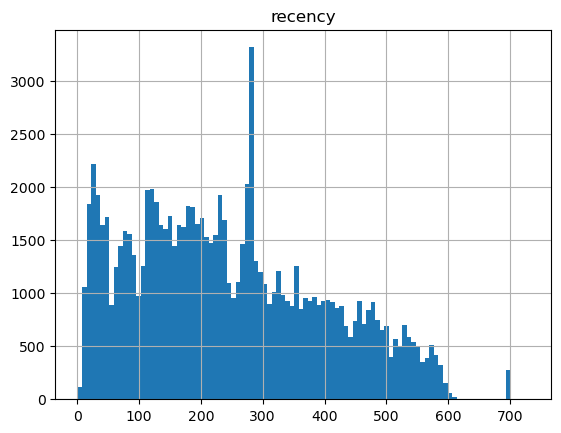

In [125]:
df_6_rfm.hist(column = 'recency', bins= 100)

In [126]:
df_6_rfm['recency'].quantile([.33, .66])

0.33    154.0
0.66    293.0
Name: recency, dtype: float64

Квантили 0.33 и 0.66 указываеют нам на то, что примерно 33% пользователей сделали покупки в последние 154 дня, а 66% всех пользователей сделали покупки в последние 293 дней. Для данной метрики, предлагаю привязаться к "круглым датам": пол года и год, т.к. они более понятны для чтения данных + не так сильно разбегаются с нашими квантилями.  

Возьмём следующие границы метрики recency для кластаризации:  
1 - «Хороший» показатель — до 180 дней (пол года)  
2 - «Средний» показатель — от 181 до 365 дней (от полугода до года)  
3 - «Плохой» показатель  — от 366 дня (больше года).

Сразу создадим функцию для разбивания метрики в датафреме на границы указанные выше.

In [127]:
def r_score(x):
    if x <= 180:
        return 1
    elif x >= 366:
        return 3
    else:
        return 2

______________________________________________________________________________________________________

**Monetary** - сумма покупок за всё время

In [128]:
df_6_rfm.sort_values('monetary', ascending = False)

,customer_unique_id,recency,frequency,monetary
3788,0a0a92112bd4c708ca5fde585afaa872,340,8,13440.00
81004,da122df9eeddfedc1dc1f5349a1a690c,521,2,7388.00
43937,763c8b1c9c68a0229c42c9fc6f662b93,51,4,7160.00
81843,dc4802a71eae9be1dd28f5d788ceb526,569,1,6735.00
25902,459bef486812aa25204be022145caa62,41,1,6729.00
...,...,...,...,...
76935,cf3839da0d9492ad151690b65f45d800,214,1,2.99
70226,bd06ce0e06ad77a7f681f1a4960a3cc6,356,1,2.29
18436,317cfc692e3f86c45c95697c61c853a6,10,1,2.20
66695,b38211bd797f4fdd81a98b9d1754b606,133,1,0.85


array([[<Axes: title={'center': 'monetary'}>]], dtype=object)

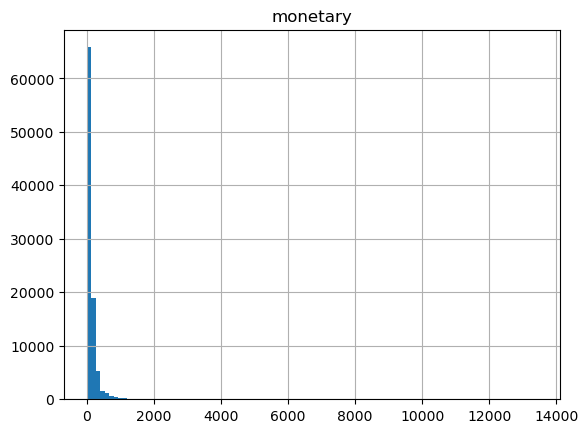

In [129]:
df_6_rfm.hist(column = 'monetary', bins= 100)

In [130]:
df_6_rfm['monetary'].quantile([.25, .5, .75, .99])

0.25      47.90
0.50      89.89
0.75     155.00
0.99    1005.13
Name: monetary, dtype: float64

Смотря на распределение можно понять, что у нас есть выбросы по тратам. Для данной метрики, предлагаю привязаться к среднему (медианному, чтобы невилировать выбросы) значению трат пользователя, которое равно 90 y.e. и взять следующие границы:  

1 - "исключительный" показатель - больше 1005 y.e. (топ 1% пользователей по тратам)  
2 - "отличный" показатель - от 155 y.e. до 1004.99 y.e.  
3 - "хороший" показатель - от 90 y.e. до 154.99 y.e.  
4 - "удовлетворительный" показатель - от 48 y.e. до 89.99 y.e.  
5 - "плохой" показатель - до 47.99 y.e.

Сразу создадим функцию для разбивания метрики в датафреме на границы указанные выше

In [131]:
def m_score(x):
    if x >= 1005:
        return 1
    elif 1005 > x >= 155:
        return 2
    elif 155 > x >= 90:
        return 3
    elif 90 > x >= 48:
        return 4
    else:
        return 5

____________________________________________________________________________________________________

**Frequency** - суммарное количество покупок у пользователя за всё время

In [132]:
df_6_rfm.sort_values('frequency', ascending = False)

,customer_unique_id,recency,frequency,monetary
74396,c8460e4251689ba205045f3ea17884a1,27,24,4080.00
25772,4546caea018ad8c692964e3382debd19,415,21,31.80
72811,c402f431464c72e27330a67f7b94d4fb,194,20,2000.00
39274,698e1cf81d01a3d389d96145f7fa6df8,377,20,1974.00
5717,0f5ac8d5c31de21d2f25e24be15bbffb,281,18,1252.35
...,...,...,...,...
33671,5a5fdc74741b68553a92d2272df59123,247,1,177.90
33670,5a5e7f5f823cff210ff66c41ce412234,310,1,19.90
33669,5a5de1734ce04f6027deb12fd924a4de,419,1,179.98
33668,5a5dd627a94c1bc236e9386eaeaa848e,281,1,27.50


In [133]:
df_6_rfm['frequency'].quantile([.87,.88])

0.87    1.0
0.88    2.0
Name: frequency, dtype: float64

array([[<Axes: title={'center': 'frequency'}>]], dtype=object)

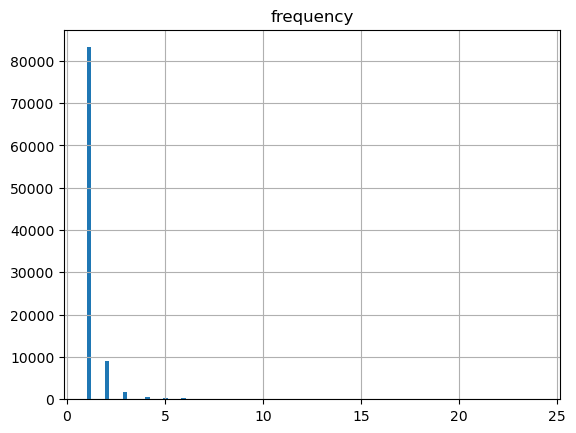

In [134]:
df_6_rfm.hist(column = 'frequency', bins= 100)

Примерно 87% всех пользователей совершили всего лишь одну покупку. Соответственно, есть смысл создать разбивку метрики на следующие границы:  

1 - "отличный" показатель - от 11 покупок  
2 - "хороший" показатель - от 2 до 10 покупок  
3 - "нормальный" показатель - 1 покупка

Сразу создадим функцию для разбивания метрики в датафреме на границы указанные выше

In [135]:
def f_score(x):
    if x >= 11:
        return 1
    elif x == 1:
        return 3
    else:
        return 2

____________________________________________________________________________________________________________

In [136]:
df_6_rfm['R'] = df_6_rfm['recency'].apply(lambda x: r_score(x)) # создадим столбец с численным показателем recency
df_6_rfm['F'] = df_6_rfm['frequency'].apply(lambda x: f_score(x)) # создадим столбец с численным показателем frequency
df_6_rfm['M'] = df_6_rfm['monetary'].apply(lambda x: m_score(x)) # создадим столбец с численным показателем monetary

In [137]:
df_6_rfm

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,1,3,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,18.90,1,3,5
2,0000f46a3911fa3c0805444483337064,543,1,69.00,3,3,4
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,25.99,2,3,5
4,0004aac84e0df4da2b147fca70cf8255,294,1,180.00,2,3,2
...,...,...,...,...,...,...,...
94971,fffcf5a5ff07b0908bd4e2dbc735a684,453,2,1570.00,3,2,1
94972,fffea47cd6d3cc0a88bd621562a9d061,268,1,64.89,2,3,4
94973,ffff371b4d645b6ecea244b27531430a,574,1,89.90,3,3,4
94974,ffff5962728ec6157033ef9805bacc48,125,1,115.00,1,3,3


In [138]:
df_6_rfm['RFM_Score'] = df_6_rfm['R']*100 + df_6_rfm['F']*10 + df_6_rfm['M']
# создадим колонку с обозначением кластера, сделано это таким образом,
# чтобы корректно отрабатывала функция создающая описание (description)

In [139]:
df_6_rfm

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,1,3,3,133
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,18.90,1,3,5,135
2,0000f46a3911fa3c0805444483337064,543,1,69.00,3,3,4,334
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,25.99,2,3,5,235
4,0004aac84e0df4da2b147fca70cf8255,294,1,180.00,2,3,2,232
...,...,...,...,...,...,...,...,...
94971,fffcf5a5ff07b0908bd4e2dbc735a684,453,2,1570.00,3,2,1,321
94972,fffea47cd6d3cc0a88bd621562a9d061,268,1,64.89,2,3,4,234
94973,ffff371b4d645b6ecea244b27531430a,574,1,89.90,3,3,4,334
94974,ffff5962728ec6157033ef9805bacc48,125,1,115.00,1,3,3,133


In [140]:
def description(x):
    r = x//100
    f = x%100//10
    m = x%10
    if 1<=r<=3 and 1<=f<=3 and 1<=m<=5:
        if r == 1: 
            a = 'recency до 180 дней'
        elif r == 2:
            a = 'recency от 181 до 365 дней'
        else:
            a = 'recency от 366 дней'

        if f == 1:
            b = 'frequency от 11 покупок'
        elif f == 2:
            b = 'frequency от 2 до 10 покупок'
        else:
            b = '1 покупка'

        if m == 1:
            c = 'monetary больше 1005 y.e.'
        elif m == 2:
            c = 'monetary от 155 y.e. до 1004.99 y.e.'
        elif m == 3:
            c = 'monetary от 90 y.e. до 154.99 y.e.'
        elif m == 4:
            c = 'monetary от 48 y.e. до 89.99 y.e.'
        else:
            c = 'monetary до 47.99 y.e.'

        return 'Сегмент имеет следующие границы метрик: ' + a +", " + b +", "+ c
    else:
        return 'Error'
# функция для создания описания кластера в таблице.

In [141]:
df_6_rfm['description'] = df_6_rfm['RFM_Score'].apply(lambda x: description(x)) 
# создадим колонку с описанием кластера в таблице df_6_rfm

In [142]:
df_6_rfm

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Score,description
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,1,3,3,133,Сегмент имеет следующие границы метрик: recenc...
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,18.90,1,3,5,135,Сегмент имеет следующие границы метрик: recenc...
2,0000f46a3911fa3c0805444483337064,543,1,69.00,3,3,4,334,Сегмент имеет следующие границы метрик: recenc...
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,25.99,2,3,5,235,Сегмент имеет следующие границы метрик: recenc...
4,0004aac84e0df4da2b147fca70cf8255,294,1,180.00,2,3,2,232,Сегмент имеет следующие границы метрик: recenc...
...,...,...,...,...,...,...,...,...,...
94971,fffcf5a5ff07b0908bd4e2dbc735a684,453,2,1570.00,3,2,1,321,Сегмент имеет следующие границы метрик: recenc...
94972,fffea47cd6d3cc0a88bd621562a9d061,268,1,64.89,2,3,4,234,Сегмент имеет следующие границы метрик: recenc...
94973,ffff371b4d645b6ecea244b27531430a,574,1,89.90,3,3,4,334,Сегмент имеет следующие границы метрик: recenc...
94974,ffff5962728ec6157033ef9805bacc48,125,1,115.00,1,3,3,133,Сегмент имеет следующие границы метрик: recenc...


Описание не красиво выводится, мы не можем его прочитать.  
Для удобства интрепритации данных присвойте переменной cluster в ячейке ниже номер кластера, в формате целого числа, например 132.  
Для корректной работы функции должны соблюдаться следующие условия:  
+ Первое число может быть от 1 до 3, второе от 1 до 3, третье от 1 до 5.
+ Число должо быть трёхзначным.

В противном случае, функция выдаст ошибку.

In [143]:
cluster = 132

description(cluster)

'Сегмент имеет следующие границы метрик: recency до 180 дней, 1 покупка, monetary от 155 y.e. до 1004.99 y.e.'

In [144]:
df_6_rfm_resolve = df_6_rfm.groupby(['RFM_Score', 'description']).agg({'customer_unique_id':'count'}).sort_values('customer_unique_id', ascending = False)
# таблица с количеством пользователей в каждом сегменте

## Ответом на задание №6 является таблица df_6_rfm_resolve.

In [145]:
df_6_rfm_resolve

,,customer_unique_id
RFM_Score,description,
234,"Сегмент имеет следующие границы метрик: recency от 181 до 365 дней, 1 покупка, monetary от 48 y.e. до 89.99 y.e.",8984
135,"Сегмент имеет следующие границы метрик: recency до 180 дней, 1 покупка, monetary до 47.99 y.e.",8945
134,"Сегмент имеет следующие границы метрик: recency до 180 дней, 1 покупка, monetary от 48 y.e. до 89.99 y.e.",8601
235,"Сегмент имеет следующие границы метрик: recency от 181 до 365 дней, 1 покупка, monetary до 47.99 y.e.",8482
133,"Сегмент имеет следующие границы метрик: recency до 180 дней, 1 покупка, monetary от 90 y.e. до 154.99 y.e.",7928
233,"Сегмент имеет следующие границы метрик: recency от 181 до 365 дней, 1 покупка, monetary от 90 y.e. до 154.99 y.e.",6947
132,"Сегмент имеет следующие границы метрик: recency до 180 дней, 1 покупка, monetary от 155 y.e. до 1004.99 y.e.",6834
232,"Сегмент имеет следующие границы метрик: recency от 181 до 365 дней, 1 покупка, monetary от 155 y.e. до 1004.99 y.e.",6474
334,"Сегмент имеет следующие границы метрик: recency от 366 дней, 1 покупка, monetary от 48 y.e. до 89.99 y.e.",5568
